This python notebook is based on the book "Python for Finance: Mastering Data-Driven Finance" by Yves Hilpisch.

Elaborated by: Francisco Arizola

# Part III: Financial Data Science

## Chapter 13: Statistics

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import math
import numpy.random as npr
import scipy.stats as scs
import statsmodels.api as sm
import os

# Style pyplot with serif font
plt.rcParams['font.family'] = 'serif'

# 3D plotting library
from mpl_toolkits.mplot3d import Axes3D

# Comment the next line if you do not have cufflinks and plotly installed
!pip install cufflinks plotly

import pandas as pd
import cufflinks as cf 
import plotly.offline as plyo

# Initialize plotly to work in offline mode
plyo.init_notebook_mode(connected=True)

# Optional: if you are using Jupyter Notebook, you might want to enable inline plotting
cf.go_offline()

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/81.7 kB 220.2 kB/s eta 0:00:01
     --------------------------------- ---- 71.7/81.7 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 415.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=f7574697d70cfec607ed3115fd90249c5d69e6d28a17e43245b59d5664d2c6b9
  Stored in directory: c:\users\franc\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3b79f6cf66f7a
Successfully built cufflinks


### Normality Tests

The following cornerstones of financial theory rest to a large extent on the assumption that returns of a financial instrument are normally distributed: Portfolio Theory, Capital Asset Pricing Model (CAPM), Efficient Market Hypothesis, Option Pricing Theory, among others.

In [3]:
# Load dataset
raw = pd.read_csv('../source/tr_eikon_eod_data.csv',index_col=0, parse_dates=True).dropna()
display(raw)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58


In [5]:
# Keep instruments of interest
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

data = raw[symbols]
data = data.dropna()
display(data)

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660
...,...,...,...,...
2018-06-25,271.00,119.89,182.170000,98.390
2018-06-26,271.60,119.26,184.430000,99.080
2018-06-27,269.35,118.58,184.160000,97.540


<Axes: xlabel='Date'>

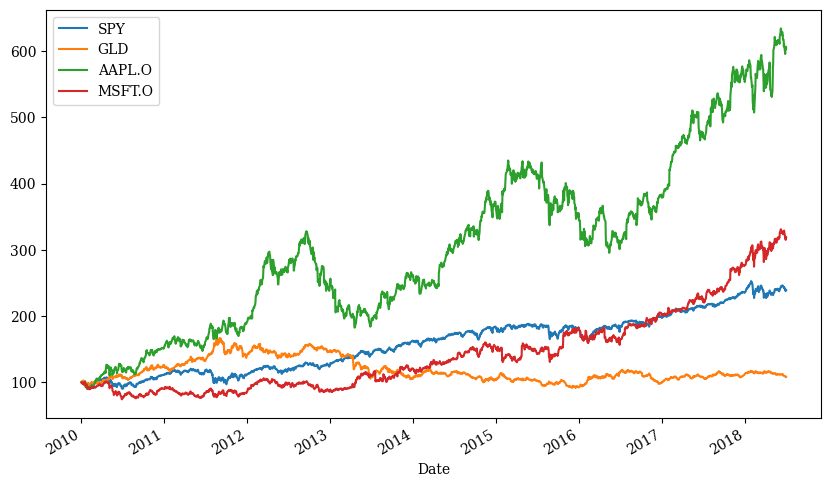

In [7]:
# Plot the time series
(data / data.iloc[0] * 100).plot(figsize=(10, 6))

In [9]:
# Calculate log returns
log_returns = np.log(data / data.shift(1))
display(log_returns)

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807
...,...,...,...,...
2018-06-25,-0.013706,-0.003746,-0.014983,-0.020323
2018-06-26,0.002212,-0.005269,0.012330,0.006988
2018-06-27,-0.008319,-0.005718,-0.001465,-0.015665


array([[<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>]], dtype=object)

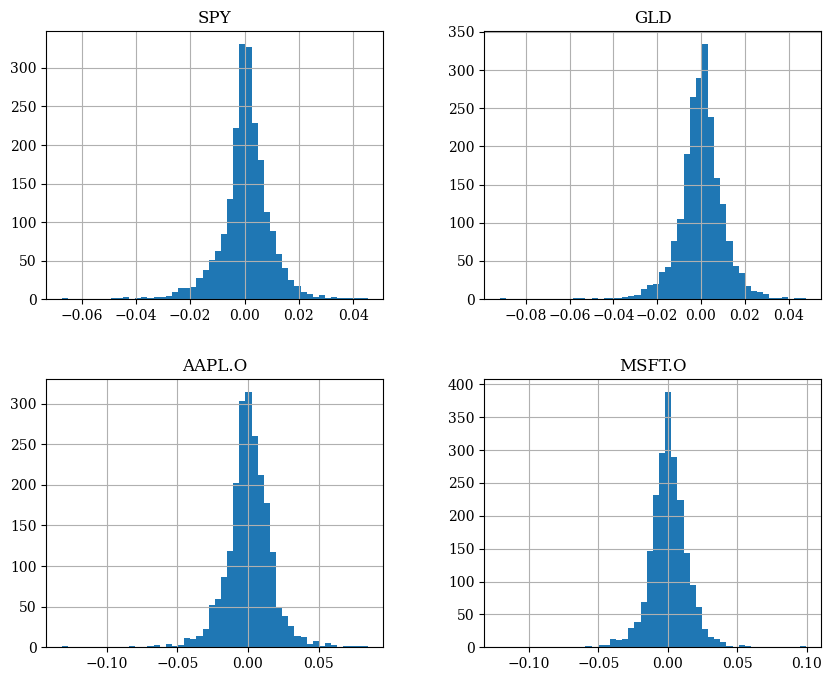

In [11]:
# Plot distribution of log returns
log_returns.hist(bins=50, figsize=(10, 8))

In [7]:
# Function to print statistics
def print_statistics(array):
 ''' Prints selected statistics.
 Parameters
 ==========
 array: ndarray
 object to generate statistics on
 '''
 sta = scs.describe(array)
 print('%14s %15s' % ('statistic', 'value'))
 print(30 * '-')
 print('%14s %15.5f' % ('size', sta[0]))
 print('%14s %15.5f' % ('min', sta[1][0]))
 print('%14s %15.5f' % ('max', sta[1][1]))
 print('%14s %15.5f' % ('mean', sta[2]))
 print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
 print('%14s %15.5f' % ('skew', sta[4]))
 print('%14s %15.5f' % ('kurtosis', sta[5]))

In [8]:
for sym in symbols:
 print('\nResults for symbol {}'.format(sym))
 print(30 * '-')
 log_data = np.array(log_returns[sym].dropna())
 print_statistics(log_data) 


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.06734
           max         0.04545
          mean         0.00041
           std         0.00933
          skew        -0.52189
      kurtosis         4.52432

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.09191
           max         0.04795
          mean         0.00004
           std         0.01020
          skew        -0.59934
      kurtosis         5.68423

Results for symbol AAPL.O
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.13187
           max         0.08502
          mean         0.00084
           std         0.01591
          skew        -0.23510
      kurtosis         4.7

Text(0, 0.5, 'sample quantiles')

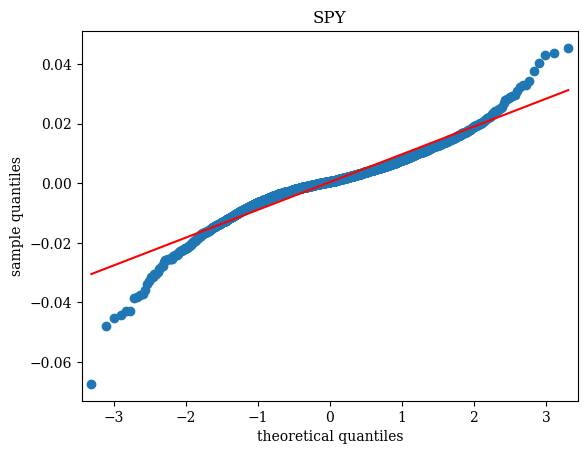

In [9]:
# QQ plot for SPY
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

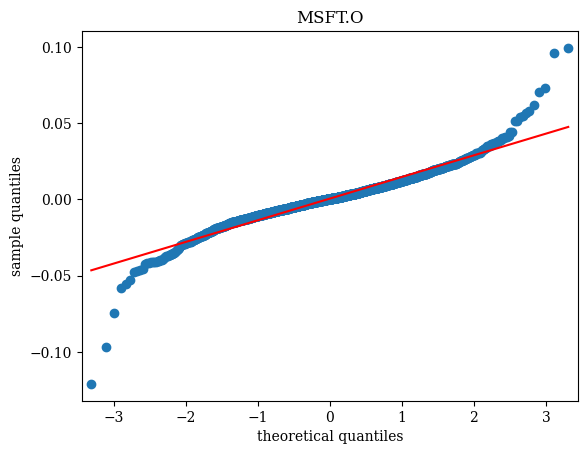

In [10]:
# QQ plot for MSFT
sm.qqplot(log_returns['MSFT.O'].dropna(), line='s')
plt.title('MSFT.O')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Obviously, the sample quantile values do not lie on a straight line, indicating “non-normality.” On the left and right sides there are many values that lie well below the line and well above the line, respectively. In other words, the time series data exhibits fat tails. This term refers to a (frequency) distribution where large negative and positive values are observed more
often than a normal distribution would imply.

In [11]:
# Normality test function
def normality_tests(arr):
 ''' Tests for normality distribution of given data set.
 Parameters
 ==========
 array: ndarray
 object to generate statistics on
 '''
 print('Skew of data set %14.3f' % scs.skew(arr))
 print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
 print('Kurt of data set %14.3f' % scs.kurtosis(arr))
 print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
 print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [12]:
# Normality test for each symbol
for sym in symbols:
 print('\nResults for symbol {}'.format(sym))
 print(32 * '-')
 log_data = np.array(log_returns[sym].dropna())
 normality_tests(log_data)


Results for symbol SPY
--------------------------------
Skew of data set         -0.522
Skew test p-value          0.000
Kurt of data set          4.524
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set         -0.599
Skew test p-value          0.000
Kurt of data set          5.684
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL.O
--------------------------------
Skew of data set         -0.235
Skew test p-value          0.000
Kurt of data set          4.790
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT.O
--------------------------------
Skew of data set         -0.091
Skew test p-value          0.085
Kurt of data set          7.291
Kurt test p-value          0.000
Norm test p-value          0.000


The p-values of the different tests are all zero, strongly rejecting the test hypothesis that the different sample data sets are normally distributed. This shows that the normal assumption for stock market returns and other asset classes—as, for example, embodied in the geometric Brownian motion model—cannot be justified in general and that one might have to use richer models that are able to generate fat tails.

### Portfolio Optimization

The analysis and examples that follow use the same financial instruments as before. The basic idea of MPT is to make use of diversification to achieve a minimal portfolio risk given a target return level or a maximum portfolio return given a certain level of risk.

array([[<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>],
       [<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>]],
      dtype=object)

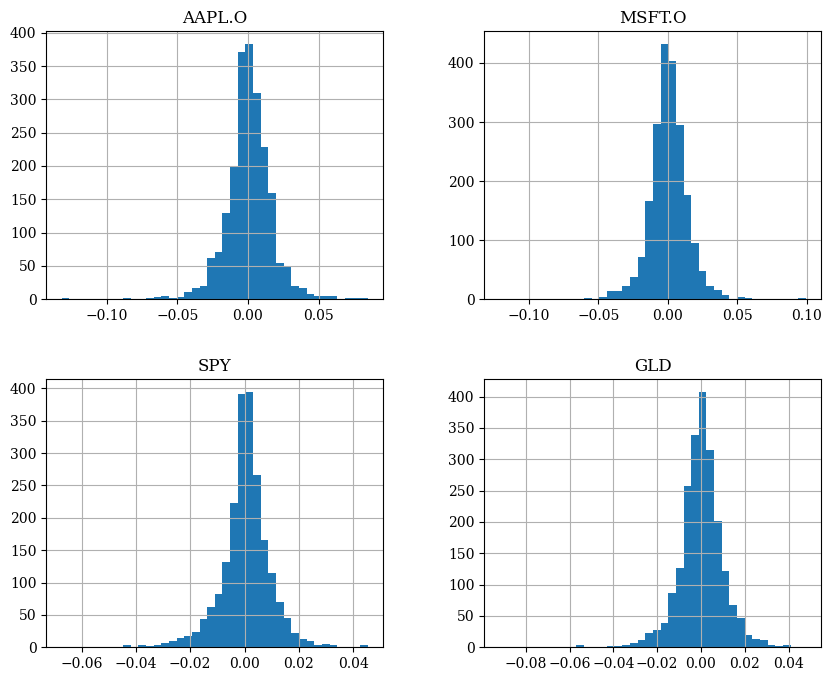

In [13]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']
noa = len(symbols) # Number of financial instruments defined
data = raw[symbols]

# Logarithmic returns
rets = np.log(data / data.shift(1))
rets.hist(bins=40, figsize=(10, 8))

In [14]:
# Annualized mean returns
rets.mean() * 252 # Working days (or financial operational days) in a year

AAPL.O    0.212359
MSFT.O    0.136648
SPY       0.102928
GLD       0.009141
dtype: float64

In [15]:
# Annualized covariance matrix
rets.cov() * 252

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.063773,0.023427,0.021039,0.001513
MSFT.O,0.023427,0.050917,0.022244,-0.000347
SPY,0.021039,0.022244,0.021939,0.000062
GLD,0.001513,-0.000347,0.000062,0.026209


In what follows, it is assumed that an investor is not allowed to set up short positions in a financial instrument. Only long positions are allowed, which implies that 100% of the investor’s wealth has to be divided among the available instruments in such a way that all positions are long (positive) and that the positions add up to 100%.

In [16]:
weights = np.random.random(noa) # Random portfolio weights
weights /= np.sum(weights) # Normalized it to 1 (or 100%)
weights

array([0.13029991, 0.5954432 , 0.03691015, 0.23734673])

In [17]:
weights.sum()

0.9999999999999999

##### Equation 13-1. General formula for expected portfolio return

$$
\mu_p = E\left(\sum_{i=1}^{I} w_i r_i \right) = \sum_{i=1}^{I} w_i E(r_i) = \sum_{i=1}^{I} w_i \mu_i = w^T \mu
$$

In [18]:
# Annualized portfolio (expected) return given the weights
np.sum(rets.mean() * weights) * 252

0.11500538947572204

##### Equation 13-2. General formula for portfolio variance

$$
\sigma_p^2 = \sum_{i=1}^{I} \sum_{j=1}^{I} w_i w_j \sigma_{ij} = w^T \Sigma w
$$

In [19]:
# Annualized portfolio variance given the portfolio weights
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

# The np.dot() function gives the dot product of two vectors/matrices

0.025453632759097847

In [20]:
# Annualized portfolio volatility given the portfolio weights
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.15954194670712102

In [21]:
# The following implements a Monte Carlo simulation (see Chapter 12) to generate random portfolio weight vectors on a larger 
# scale. For every simulated allocation, the code records the resulting expected portfolio return and variance.

# Function to calculate portfolio return
def port_ret(weights):
 return np.sum(rets.mean() * weights) * 252

# Function to calculte portofolio volatility
def port_vol(weights):
 return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [22]:
prets = []
pvols = []

# Monte Carlo simulation of portfolio weights
for p in range (2500):
 weights = np.random.random(noa)
 weights /= np.sum(weights)
 # Collects the resulting statistics in list objects
 prets.append(port_ret(weights))
 pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

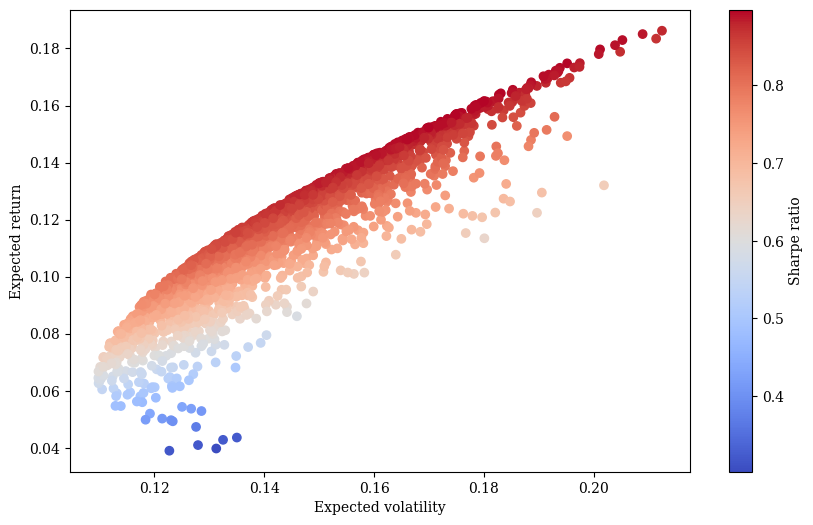

In [23]:
# Plot simulation results
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,marker='o', cmap='coolwarm')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')

In addition, the graph, through color intensity, illustrates the sharpe ratio for the different portfolio combinations. The Sharpe ratio is a measure of risk-adjusted return. It indicates how much excess return you are receiving for the extra volatility that you endure for holding a riskier asset. A higher Sharpe ratio implies better risk-adjusted performance.

##### Equation 13-3. Sharpe Ratio

$$
\text{Sharpe Ratio} = \frac{E(R_p) - R_f}{\sigma_p}
$$

where:
- $E(R_p)$ is the expected return of the portfolio.
- $R_f$ is the risk-free rate.
- $\sigma_p$ is the standard deviation of the portfolio's excess return (a measure of risk).

As an investor, one is generally interested in the maximum return given a fixed risk level or the minimum risk given a fixed return expectation. This set of portfolios then makes up the so-called efficient frontier.

#### Optimal portfolios

In [24]:
import scipy.optimize as sco

In [25]:
# Keep in mind that to minimize the negative value of the sharpe ratio is the same as maximizing the positive value

# Function to be minimized
def min_func_sharpe(weights):
 return -port_ret(weights) / port_vol(weights)

# Equality constraint
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for the weights
bnds = tuple((0, 1) for x in range(noa))

# Weights vector
eweights = np.array(noa * [1. / noa,])
eweights

array([0.25, 0.25, 0.25, 0.25])

In [26]:
# Maximize the sharpe ratio
min_func_sharpe(eweights)

-0.8436203363155396

In [27]:
# Time the optimization process
%time
opts = sco.minimize(min_func_sharpe, eweights,
                     method='SLSQP', bounds=bnds,
                     constraints=cons)

CPU times: total: 0 ns
Wall time: 0 ns


In [28]:
# See the 'opts' object information
opts

     fun: -0.8976673894088557
     jac: array([ 8.96826386e-05,  8.30590725e-05, -2.45958567e-04,  1.92970037e-05])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.51191352, 0.19126413, 0.25454109, 0.04228126])

In [29]:
# The optimal portfolio weights for the maximum sharpe ratio
opts['x'].round(3)

array([0.512, 0.191, 0.255, 0.042])

In [30]:
# Print results of optimization (optimal portfolio with the highest sharpe ratio)
print("Portfolio expected return:",port_ret(opts['x']).round(3)) 
print("Portfolio volatility:",port_vol(opts['x']).round(3))
print("Portfolio Sharpe ratio:",port_ret(opts['x']) / port_vol(opts['x'])) # The maximum Sharpe ratio

Portfolio expected return: 0.161
Portfolio volatility: 0.18
Portfolio Sharpe ratio: 0.8976673894088557


In [31]:
# Optimal portfolio with the minimum global variance/volatility
# The minimization of the portfolio volatility
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

# Weights for maximum return given the volatility level
optv['x'].round(3)

array([0.   , 0.001, 0.543, 0.456])

In [32]:
# Print results of optimization
print("Portfolio expected return:",port_ret(optv['x']).round(3)) 
print("Portfolio volatility:",port_vol(optv['x']).round(3))
print("Portfolio Sharpe ratio:",port_ret(optv['x']) / port_vol(optv['x'])) # The maximum Sharpe ratio

Portfolio expected return: 0.06
Portfolio volatility: 0.109
Portfolio Sharpe ratio: 0.550417364297077


#### Efficient Frontier

In [33]:
# The two binding constraints for the frontier
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for the weights
bnds = tuple((0, 1) for x in weights)

# Time the optimization process
%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []

# The minimization of portfolio volatility for different target returns
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
    bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: total: 0 ns
Wall time: 0 ns


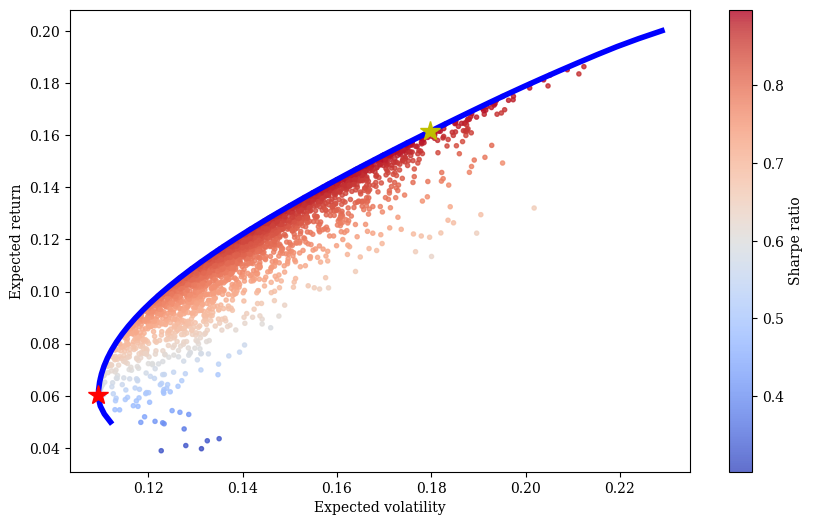

In [34]:
# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),'r*', markersize=15.0)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')

The efficient frontier is comprised of all optimal portfolios with a higher return than the absolute minimum variance portfolio. These portfolios dominate all other portfolios in terms of expected returns given a certain risk level.

#### Capital Market Line

However, in addition to risky assets, the financial markets also offer riskless assets that yield a lower return but need to be taken into consideration in the optimal portfolio selection process. 

The basic idea is that investors first determine an efficient portfolio of risky assets and then add the riskless asset to the mix. By adjusting the proportion of the investor’s wealth to be invested in the riskless asset it is possible to achieve any risk-return profile that lies on the straight line (in the risk-return space) between the riskless asset and the efficient risky portfolio.

In [35]:
import scipy.interpolate as sci

In [36]:
# Index position of minimum volatility portfolio
ind = np.argmin(tvols)

# Relevant portfolio volatility and return values
evols = tvols[ind:]
erets = trets[ind:]

# Cubic splines interpolation on these values
tck = sci.splrep(evols, erets) 

def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)


def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

Since there is no closed formula for the efficient frontier or the first derivative of it, one has to solve the system of equations in Equation 13-3 numerically. These are the conditions that the function needs to satisfy.

##### Equation 13-3. Mathematical conditions for capital market line

$$t(x) = a + b \cdot x$$

$$t(0) = r_f \iff a = r_f$$

$$t(x) = f(x) \iff a + b \cdot x = f(x)$$

$$t'(x) = f'(x) \iff b = f'(x)$$

In [37]:
# Create function that sets the system of equations
def equations(p, rf=0.01):
 eq1 = rf - p[0]
 eq2 = rf + p[1] * p[2] - f(p[2])
 eq3 = p[1] - df(p[2])
 return eq1, eq2, eq3

# Solving these equations for given initial values
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

# The optimal parameter values
opt

array([0.01      , 0.84470952, 0.19525392])

In [38]:
np.round(equations(opt), 6)

array([ 0.,  0., -0.])

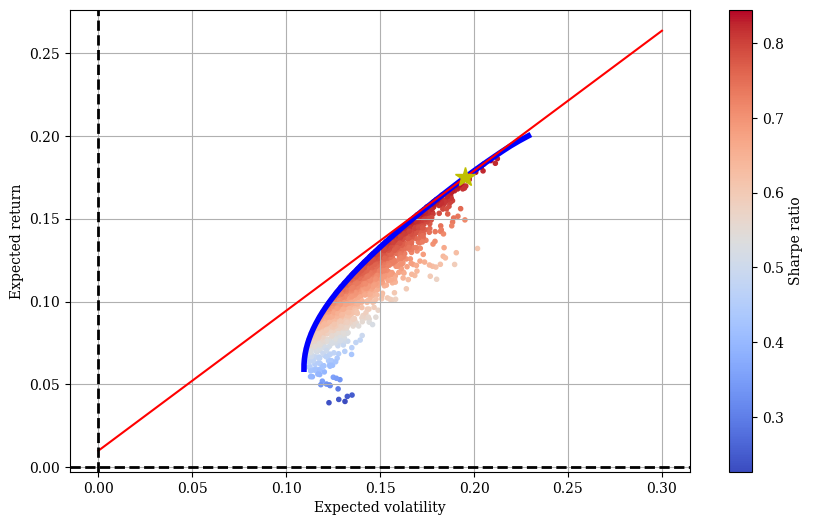

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')

In [40]:
# Constraints
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - f(opt[2])},{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Find optimal weights
res = sco.minimize(port_vol, eweights, method='SLSQP',bounds=bnds, constraints=cons)
res['x'].round(3)

array([0.59 , 0.221, 0.189, 0.   ])

In [41]:
# Print results of optimization
print("Portfolio expected return:",port_ret(res['x']).round(3)) 
print("Portfolio volatility:",port_vol(res['x']).round(3))
print("Portfolio Sharpe ratio:",port_ret(res['x']) / port_vol(res['x'])) # The maximum Sharpe ratio

Portfolio expected return: 0.175
Portfolio volatility: 0.195
Portfolio Sharpe ratio: 0.8959257887771481


### Machine Learning

#### Unsupervised Learning

Unsupervised learning embodies the idea that a machine learning algorithm discovers insights from raw data without any further guidance.

In [42]:
# Additional libraries to be used
import datetime as dt
from pylab import mpl
from sklearn.datasets import make_blobs

# Set fonts, seed and print options
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)
%matplotlib inline

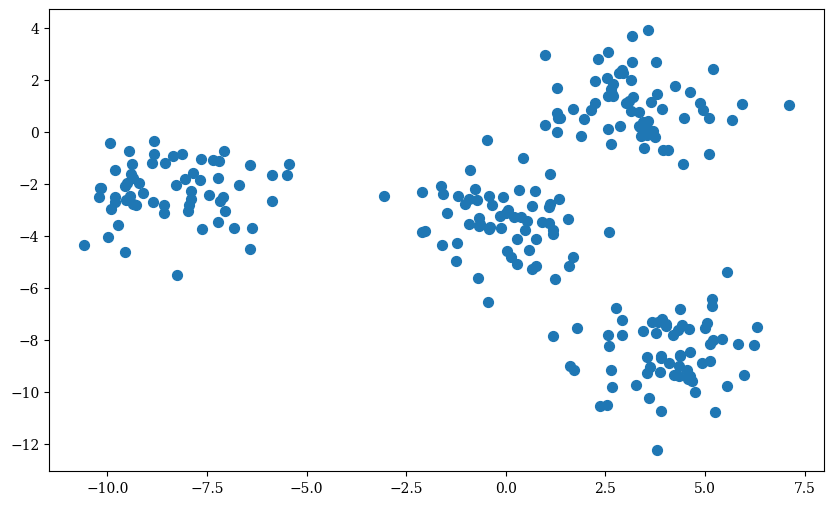

In [43]:
# Creates the sample data set for clustering with 250 samples and 4 centers
X, y = make_blobs(n_samples=250, centers=4, random_state=500, cluster_std=1.25)

# Plot the clustering
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)

#### k-means clustering

In [44]:
# Imports the k-means model from scikit-learn
from sklearn.cluster import KMeans

# Set the OMP_NUM_THREADS environment variable
os.environ["OMP_NUM_THREADS"] = "1"

# Instantiates a model object, given certain parameters; knowledge about the sample data is used to inform the instantiation
model = KMeans(n_clusters=4, n_init=10, random_state=0)

# Fits the model object to the raw data
model.fit(X)

C:\Users\Franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, n_init=10, random_state=0)

In [45]:
# Predict the cluster (number) given the raw data
y_kmeans = model.predict(X)

# Show some cluster numbers as predicted
y_kmeans[:12]

array([2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 1])

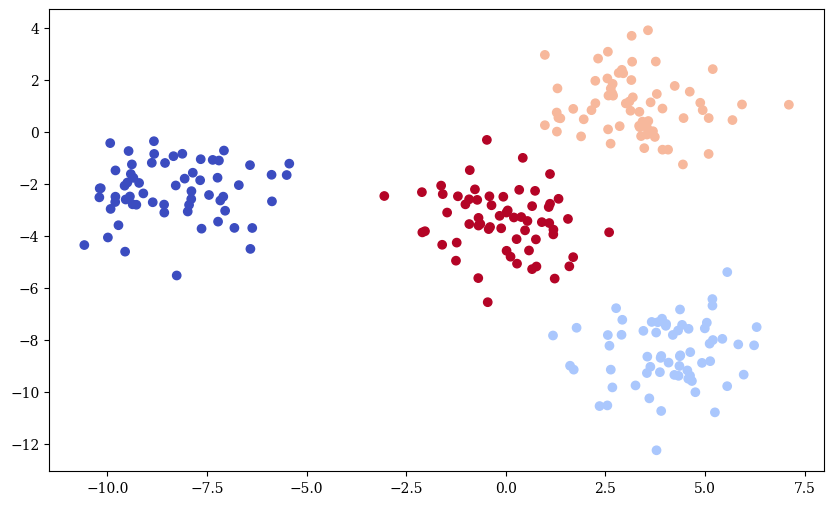

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm')

#### Gaussian mixture

In [47]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, random_state=0)
model.fit(X)

C:\Users\Franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



GaussianMixture(n_components=4, random_state=0)

In [48]:
y_gm = model.predict(X)
y_gm[:12]

array([2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 1], dtype=int64)

In [49]:
# The results from k-means clustering and Gaussian mixture are the same
(y_gm == y_kmeans).all()

True

#### Supervised Learning

In [50]:
from sklearn.datasets import make_classification

n_samples = 100
X, y = make_classification(n_samples=n_samples, n_features=2,
                            n_informative=2, n_redundant=0,
                            n_repeated=0, random_state=250)

X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [51]:
y[:5]

array([1, 0, 0, 1, 1])

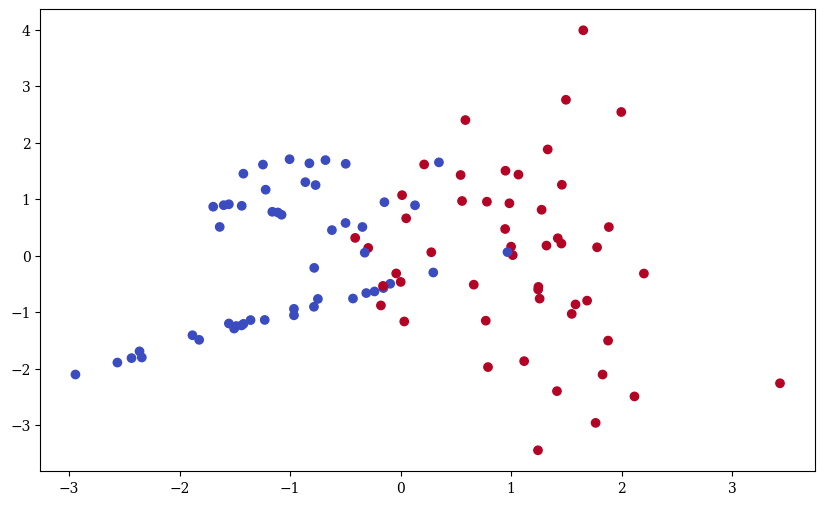

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm')